# Italian Financial Challenge - Starter Template

**Student Name:** Talaat Madi, Karol Cardillo, Michele Elia, Diego Diaz

**Challenge:** Revenue Forecasting

**Date:** [Date]

## 1. Problem Statement and Objectives (TO UPDATE)

**Challenge:** We have choosed Revenue Forecarsting for the challenge it gives and also as it seems the most instresting of the three proposed challenge

**Objective:** Predict `revenue_change`

**Success Criteria:** [Define what "good" performance looks like for your chosen challenge]

**Approach:** [Briefly outline your planned approach]

In [1]:
# Import libraries
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
import os

# Set display options
pd.set_option('display.max_columns', None)
pd.set_option('display.max_rows', 100)
plt.style.use('seaborn-v0_8-darkgrid')

# Set random seed for reproducibility
RANDOM_STATE = 42
np.random.seed(RANDOM_STATE)

# Suppress warnings
import warnings
warnings.filterwarnings('ignore')

print("Libraries imported successfully!")

Libraries imported successfully!


## 2. Data Loading and Exploration

Load the training data and perform initial exploration.

In [2]:
# Load training data
train_df = pd.read_csv('../data/processed/train_data.csv')

print(f"Dataset shape: {train_df.shape}")
print(f"\nColumns: {train_df.columns.tolist()}")
print(f"\nFirst few rows:")
train_df.head()

Dataset shape: (11828, 30)

Columns: ['company_id', 'fiscal_year', 'province', 'region', 'ateco_sector', 'legal_form', 'years_in_business', 'total_fixed_assets', 'current_assets', 'total_assets', 'shareholders_equity', 'total_debt', 'short_term_debt', 'long_term_debt', 'production_value', 'production_costs', 'operating_income', 'financial_income', 'financial_expenses', 'net_profit_loss', 'roe', 'roi', 'leverage', 'current_ratio', 'quick_ratio', 'debt_to_assets', 'profit_margin', 'bankruptcy_next_year', 'financial_health_class', 'revenue_change']

First few rows:


,company_id,fiscal_year,province,region,ateco_sector,legal_form,years_in_business,total_fixed_assets,current_assets,total_assets,shareholders_equity,total_debt,short_term_debt,long_term_debt,production_value,production_costs,operating_income,financial_income,financial_expenses,net_profit_loss,roe,roi,leverage,current_ratio,quick_ratio,debt_to_assets,profit_margin,bankruptcy_next_year,financial_health_class,revenue_change
0,COMP_00000,2018,NaN,Campania,47,SRL,32,2.422343e+08,9.504819e+08,1.192716e+09,3.728702e+08,8.198459e+08,5.601842e+08,2.596617e+08,1.846636e+09,1.611363e+09,2.352729e+08,4886785.12,20068071.29,2.152049e+08,0.5772,0.1973,2.1987,1.6967,1.0180,0.6874,0.1165,0,B,NaN
1,COMP_00000,2019,NaN,Campania,47,SRL,33,3.983639e+07,1.411226e+08,1.809589e+08,5.700701e+07,1.239519e+08,7.135345e+07,5.259848e+07,4.289159e+08,3.896038e+08,3.931218e+07,58246.06,2537224.20,3.677495e+07,0.6451,0.2172,2.1743,1.9778,1.1867,0.6850,0.0857,0,B,-76.77
2,COMP_00000,2020,NaN,Campania,47,SRL,34,6.662250e+08,1.367208e+09,2.033433e+09,3.029046e+08,1.730529e+09,9.904004e+08,7.401282e+08,6.956197e+09,6.988489e+09,-3.229208e+07,5327332.51,55844558.38,-8.813664e+07,-0.2910,-0.0159,5.7131,1.3805,0.8283,0.8510,-0.0127,0,D,1521.81
3,COMP_00000,2021,NaN,Campania,47,SRL,35,4.637187e+07,2.524228e+08,2.987947e+08,3.901098e+07,2.597837e+08,1.527674e+08,1.070163e+08,5.031839e+08,5.047235e+08,-1.539645e+06,116335.80,7828741.61,-9.368387e+06,-0.2401,-0.0052,6.6592,1.6523,0.9914,0.8694,-0.0186,0,D,-92.77
4,COMP_00001,2018,CA,Sardegna,62,SRL,8,8.348035e+07,1.325697e+08,2.160500e+08,6.566937e+07,1.503807e+08,7.582482e+07,7.455584e+07,4.113380e+08,3.912414e+08,2.009667e+07,640538.94,5860639.22,1.423603e+07,0.2168,0.0930,2.2900,1.7484,1.0490,0.6960,0.0346,0,B,NaN


In [3]:
# Basic information
train_df.info()

<class 'pandas.DataFrame'>
RangeIndex: 11828 entries, 0 to 11827
Data columns (total 30 columns):
 #   Column                  Non-Null Count  Dtype  
---  ------                  --------------  -----  
 0   company_id              11828 non-null  str    
 1   fiscal_year             11828 non-null  int64  
 2   province                10909 non-null  str    
 3   region                  11828 non-null  str    
 4   ateco_sector            11828 non-null  int64  
 5   legal_form              11828 non-null  str    
 6   years_in_business       11828 non-null  int64  
 7   total_fixed_assets      11828 non-null  float64
 8   current_assets          11828 non-null  float64
 9   total_assets            11828 non-null  float64
 10  shareholders_equity     11828 non-null  float64
 11  total_debt              11828 non-null  float64
 12  short_term_debt         11828 non-null  float64
 13  long_term_debt          11828 non-null  float64
 14  production_value        11828 non-null  float64
 

In [4]:
# Summary statistics
train_df.describe()

,fiscal_year,ateco_sector,years_in_business,total_fixed_assets,current_assets,total_assets,shareholders_equity,total_debt,short_term_debt,long_term_debt,production_value,production_costs,operating_income,financial_income,financial_expenses,net_profit_loss,roe,roi,leverage,current_ratio,quick_ratio,debt_to_assets,profit_margin,bankruptcy_next_year,revenue_change
count,11828.000000,11828.000000,11828.000000,1.182800e+04,1.182800e+04,1.182800e+04,1.182800e+04,1.182800e+04,1.182800e+04,1.182800e+04,1.182800e+04,1.182800e+04,1.182800e+04,1.182800e+04,1.182800e+04,1.182800e+04,11783.000000,11828.000000,11783.000000,11828.000000,11828.000000,11828.000000,11828.000000,11828.000000,8829.000000
mean,2019.495350,45.827697,35.179405,1.029206e+09,1.438435e+09,2.467641e+09,9.163141e+08,1.551327e+09,8.534656e+08,6.978617e+08,3.969063e+09,3.680129e+09,2.889337e+08,6.418314e+06,5.464980e+07,2.342839e+08,0.254267,0.123253,2.135329,1.869953,1.121972,0.633231,0.058008,0.007102,453.434570
std,1.116482,16.677183,19.908095,6.120958e+09,6.873106e+09,1.248305e+10,5.023564e+09,7.724478e+09,4.360360e+09,3.493369e+09,1.896096e+10,1.757911e+10,1.574126e+09,3.930832e+07,2.850800e+08,1.348222e+09,0.577374,0.091036,2.159040,0.614015,0.368409,0.114868,0.039245,0.083976,4601.920625
min,2018.000000,10.000000,0.000000,1.267167e+06,1.278800e+06,2.545968e+06,-3.330561e+09,1.839791e+06,8.985461e+05,9.412449e+05,2.329670e+06,1.580518e+06,-2.688184e+09,6.241000e+01,5.926949e+04,-4.062689e+09,-39.177100,-0.475300,0.818200,0.551000,0.330600,0.450000,-0.149700,0.000000,-99.940000
25%,2018.000000,41.000000,18.000000,7.319803e+07,1.244471e+08,2.087793e+08,7.070428e+07,1.294646e+08,6.925617e+07,5.666362e+07,2.984883e+08,2.731290e+08,1.698626e+07,3.569547e+05,4.355200e+06,1.049173e+07,0.110350,0.061900,1.165650,1.430800,0.858500,0.538500,0.030500,0.000000,-68.590000
50%,2019.000000,46.000000,35.000000,1.905995e+08,3.125597e+08,5.212379e+08,1.815958e+08,3.264152e+08,1.744802e+08,1.462585e+08,8.040019e+08,7.459428e+08,5.128590e+07,1.068330e+06,1.110262e+07,3.798727e+07,0.221600,0.105000,1.680300,1.811750,1.087050,0.627500,0.060300,0.000000,3.040000
75%,2020.000000,56.000000,52.000000,5.398741e+08,8.387197e+08,1.394478e+09,5.022747e+08,8.795087e+08,4.777298e+08,3.960070e+08,2.241163e+09,2.075266e+09,1.538062e+08,3.178533e+06,3.005698e+07,1.226862e+08,0.390750,0.170900,2.484850,2.238925,1.343325,0.713800,0.090000,0.000000,238.850000
max,2021.000000,82.000000,71.000000,2.548712e+11,2.512549e+11,5.061262e+11,1.956145e+11,3.105116e+11,1.699685e+11,1.405431e+11,6.044366e+11,5.736470e+11,5.621927e+10,1.640114e+09,9.311030e+09,5.011818e+10,1.771600,0.490600,101.153800,4.539300,2.723600,1.192300,0.120000,1.000000,302126.480000


In [5]:
# Check for missing values
missing_values = train_df.isnull().sum()
missing_pct = (missing_values / len(train_df)) * 100

missing_df = pd.DataFrame({
    'Missing Count': missing_values,
    'Percentage': missing_pct
})
missing_df = missing_df[missing_df['Missing Count'] > 0].sort_values('Missing Count', ascending=False)

print("Missing Values:")
print(missing_df)

Missing Values:
                Missing Count  Percentage
revenue_change           2999   25.355090
province                  919    7.769699
roe                        45    0.380453
leverage                   45    0.380453


In [6]:
print("\nRevenue Change Statistics:")
print(train_df['revenue_change'].describe())
print(f"\nMissing revenue_change: {train_df['revenue_change'].isnull().sum()}")


Revenue Change Statistics:
count      8829.000000
mean        453.434570
std        4601.920625
min         -99.940000
25%         -68.590000
50%           3.040000
75%         238.850000
max      302126.480000
Name: revenue_change, dtype: float64

Missing revenue_change: 2999


### Exploratory Data Analysis (EDA)

Create visualizations to understand the data better.

#### Distribution plots for key financial 

Observation: 
- Ratios show a distribution which is not symmetric
- Outliers are not rare
- Standardization needed for futher processing

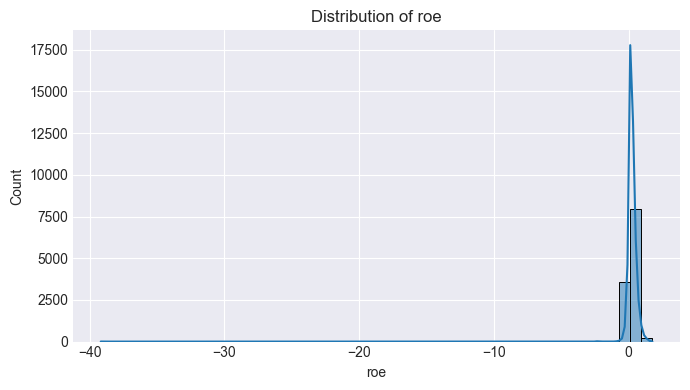

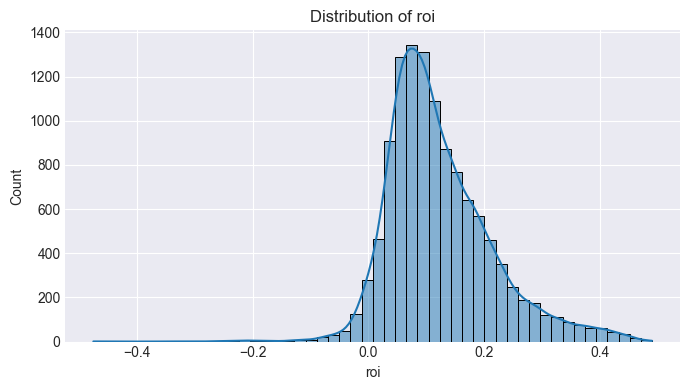

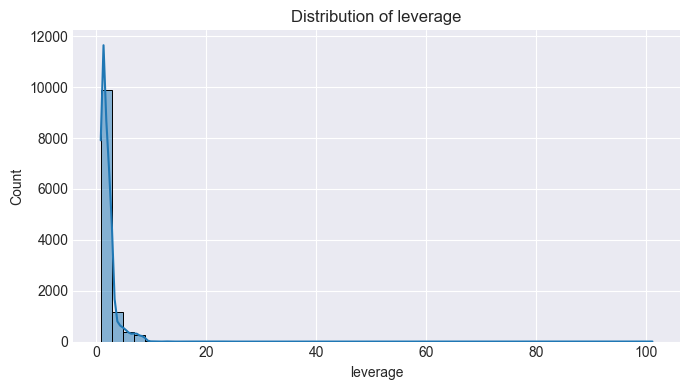

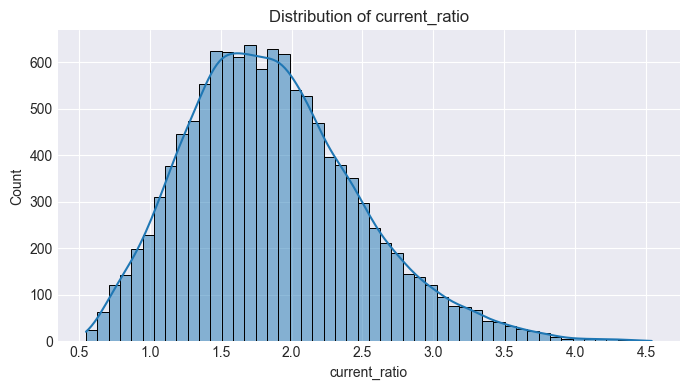

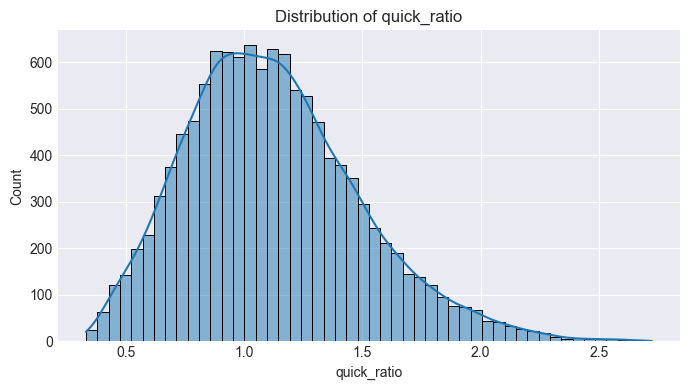

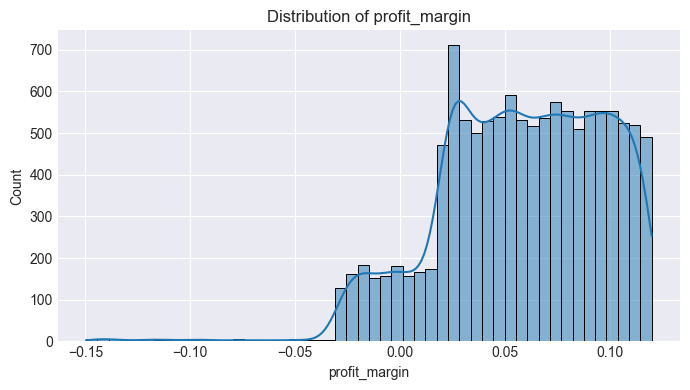

In [11]:
output = "../Images/DistributionsPlots"
os.makedirs(output, exist_ok=True)

financial_ratios = ["roe", "roi", "leverage", "current_ratio", "quick_ratio", "dept_to_assets", "profit_margin"]

financial_ratios = [c for c in financial_ratios if c in train_df.columns]

for col in financial_ratios:
    plt.figure(figsize=(7, 4))
    sns.histplot(train_df[col], bins=50, kde=True)
    plt.title(f"Distribution of {col}")
    plt.xlabel(col)
    plt.ylabel("Count")
    plt.tight_layout()

    filepath = os.path.join(output, f"{col}_distribution.png")
    plt.savefig(filepath)

    plt.show()
    plt.close() 

#### Correlation heatmap

Observation:
- Strong correlations appear among size-related variables
- Some profitability metrics show correlation with revenue change
- Multicollinearity motivates the use of regularized models

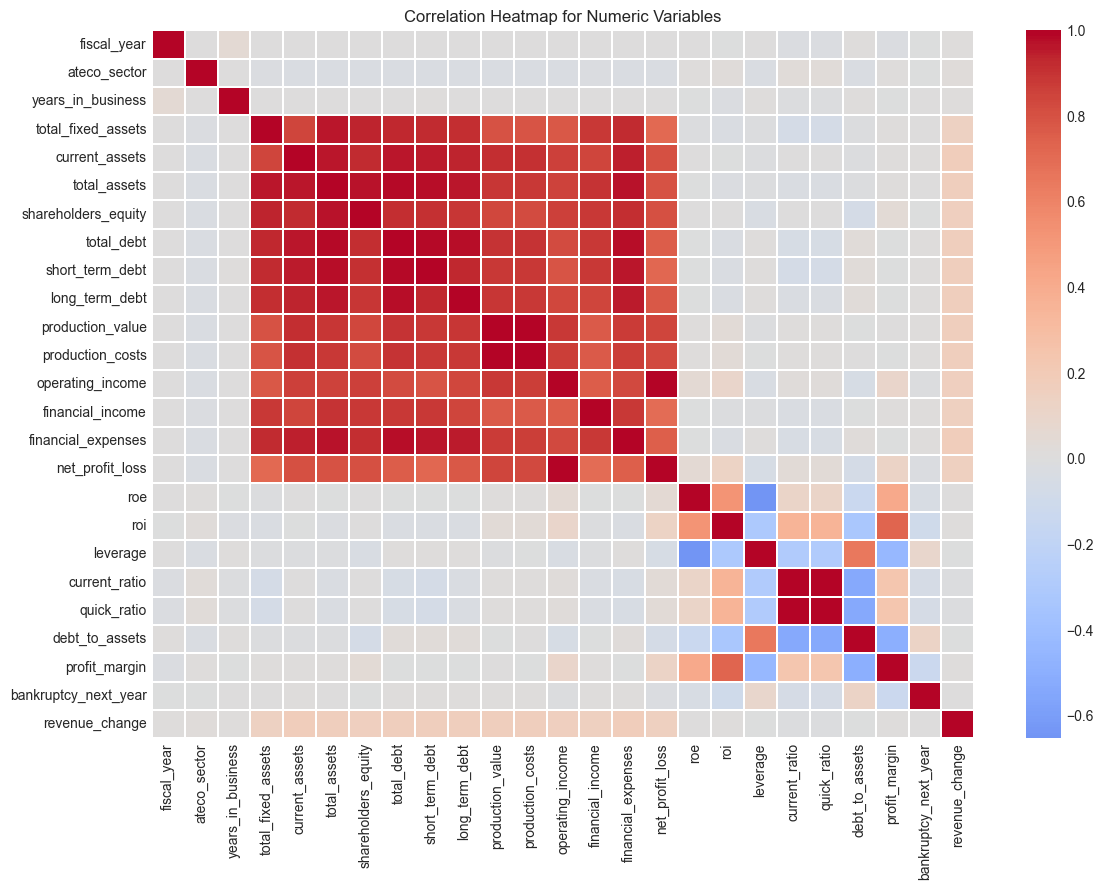

In [ ]:
numeric = train_df.select_dtypes(include=[np.number])

plt.figure(figsize=(12, 9))
corr = numeric.corr()

sns.heatmap(corr, cmap='coolwarm', center=0, linewidths=0.3)

plt.title("Correlation Heatmap for Numeric Variables")
plt.tight_layout()
plt.savefig(os.path.join("../Images", "correlation_heatmap.png"))
plt.show()
plt.close()

#### Target Variable by Sector, Region, and Year

Observation:
- Revenue growth varies across sectors and regions
- Temporal patterns suggest macroeconomic effects
- Time-aware validation is necessary

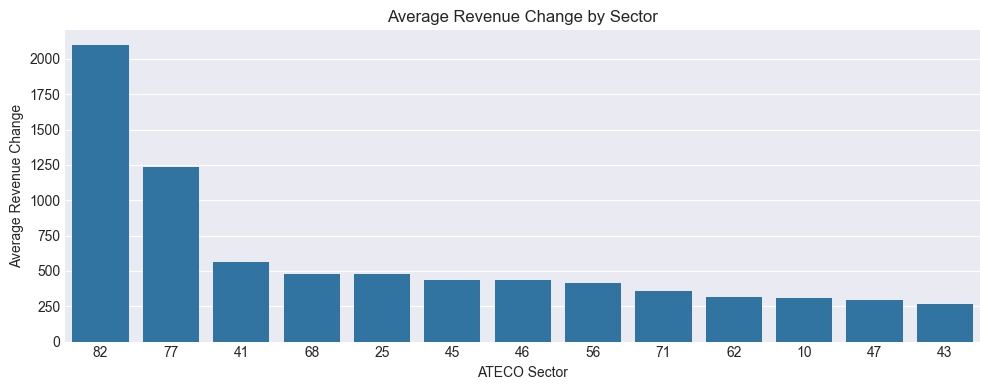

In [19]:
# Sector
os.makedirs("../Images/TargetVariable", exist_ok=True)

plt.figure(figsize=(10, 4))
mean = (train_df.groupby("ateco_sector")["revenue_change"].mean().sort_values(ascending=False))

sns.barplot(x=mean.index.astype(str), y = mean.values)

plt.title("Average Revenue Change by Sector")
plt.xlabel("ATECO Sector")
plt.ylabel("Average Revenue Change")
plt.tight_layout()
plt.savefig(os.path.join("../Images/TargetVariable", "revenue_change_by_sector.png"))
plt.show()
plt.close()


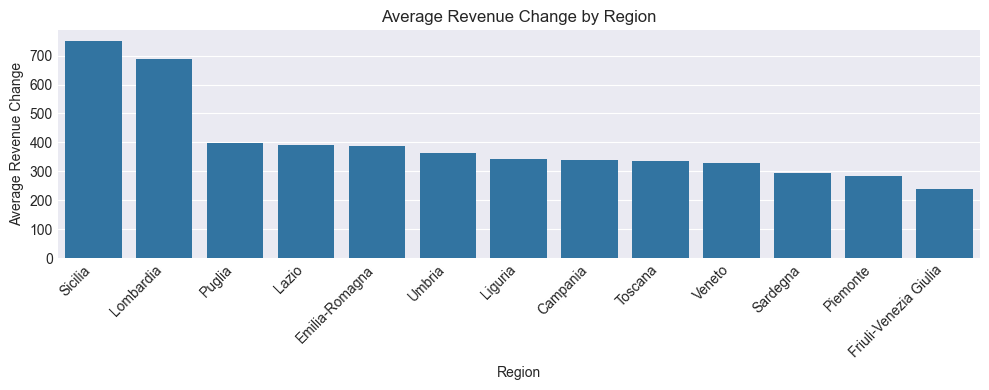

In [21]:
# Region

plt.figure(figsize=(10, 4))
mean = (train_df.groupby("region")["revenue_change"].mean().sort_values(ascending=False))
sns.barplot(x=mean.index.astype(str), y = mean.values)
plt.title("Average Revenue Change by Region")
plt.xlabel("Region")
plt.ylabel("Average Revenue Change")
plt.xticks(rotation=45, ha='right')
plt.tight_layout()
plt.savefig(os.path.join("../Images/TargetVariable", "revenue_change_by_region.png"))
plt.show()
plt.close()

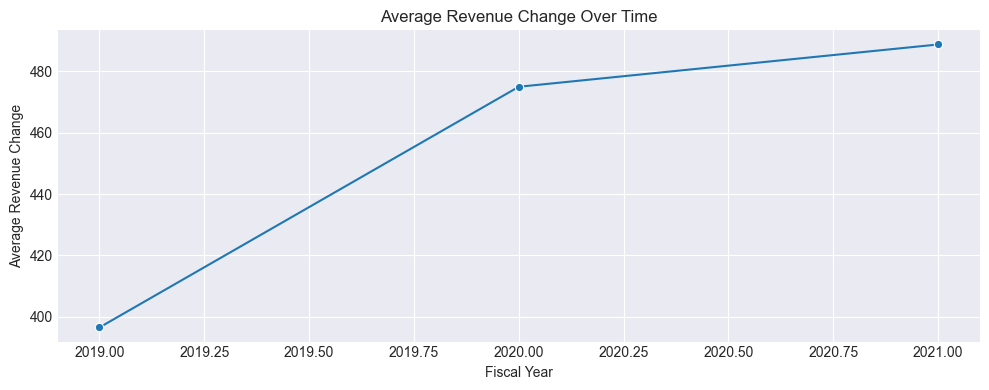

In [24]:
# Fiscal Year

plt.figure(figsize=(10, 4))
mean = (train_df.groupby("fiscal_year")["revenue_change"].mean().sort_values(ascending=False))
sns.lineplot(x=mean.index, y = mean.values, marker="o")
plt.title("Average Revenue Change Over Time")
plt.xlabel("Fiscal Year")
plt.ylabel("Average Revenue Change")
plt.tight_layout()
plt.savefig(os.path.join("../Images/TargetVariable", "revenue_change_by_fiscal_year.png"))
plt.show()
plt.close()


#### Box Plots

Observation:
- Outliers are frequent in financial data
- Justifies robust metrics (MAE) and regularization
- Outliers should be handled carefully, not blindly removed

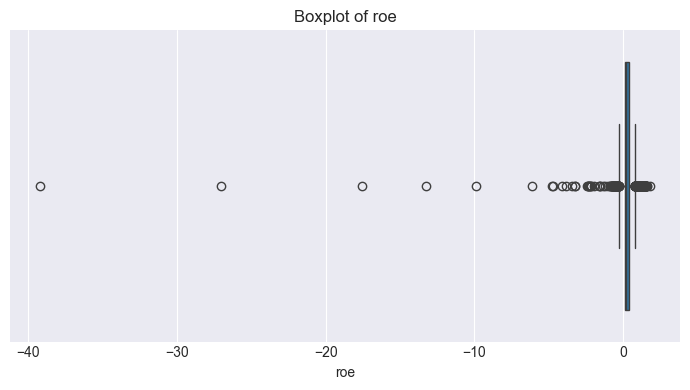

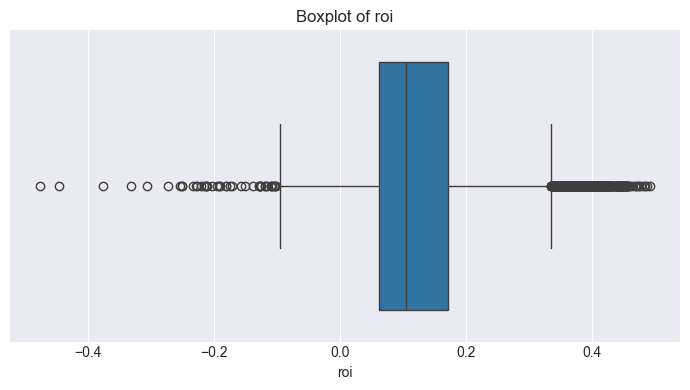

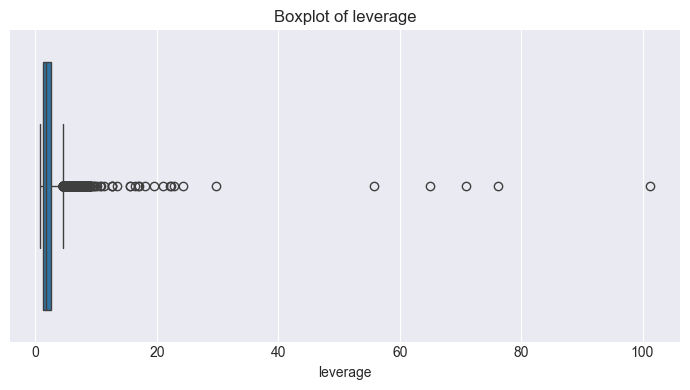

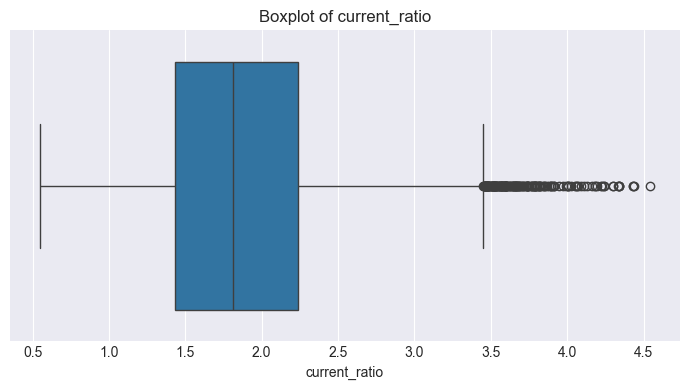

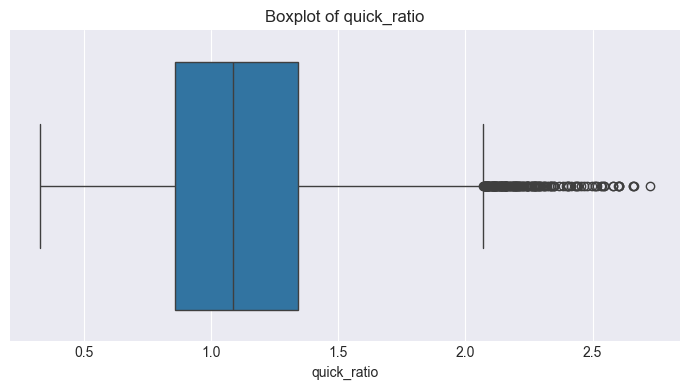

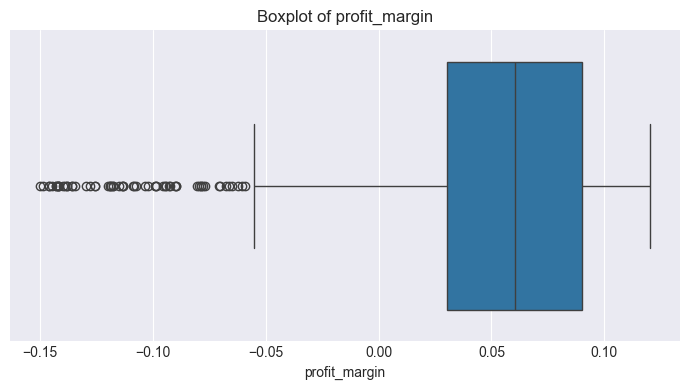

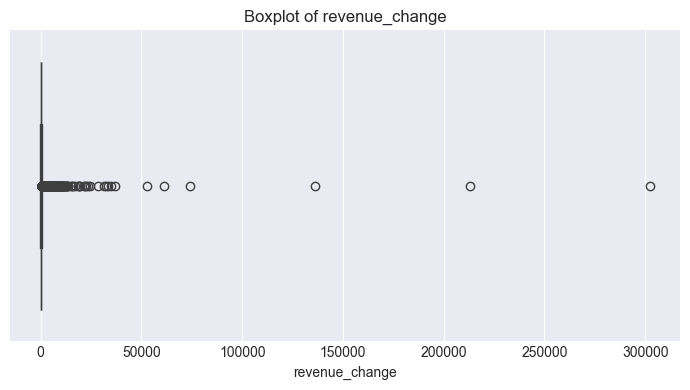

In [28]:
os.makedirs("../Images/Boxplots", exist_ok=True)

for col in financial_ratios + ['revenue_change']:
    plt.figure(figsize=(7, 4))
    sns.boxplot(x=train_df[col])
    plt.title(f"Boxplot of {col}")
    plt.xlabel(col)
    plt.tight_layout()
    plt.savefig(os.path.join("../Images/Boxplots", f"{col}_boxplot.png"))
    plt.show()
    plt.close()